<a href="https://colab.research.google.com/github/johnsteeleprogramming/JohnSteeleProgramming/blob/main/Assignment1_raw_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT 1

##LOAD LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

print("--- Pandas version ---")
print(pd.__version__)
print("--- Seaborn ---")
print(sns.__version__)
print("--- MatPlotLib ---")
print(mpl.__version__)

--- Pandas version ---
2.2.2
--- Seaborn ---
0.13.2
--- MatPlotLib ---
3.10.0


##LOAD THE HEADERS

In [ ]:
raw_house_data = '/content/raw_house_data.csv'
headers = pd.read_csv(raw_house_data, nrows=0)
print("--- HEADERS ---")
print(headers)
print("--- HEADERS COLUMNS ---")
print(headers.columns)
print("--- HEADERS COLUMNS TOLIST---")
print(headers.columns.tolist())
print("--- HEADERS PRINT ---")
for title in headers.columns.tolist():
  print(title)

--- HEADERS ---
Empty DataFrame
Columns: [MLS, sold_price, zipcode, longitude, latitude, lot_acres, taxes, year_built, bedrooms, bathrooms, sqrt_ft, garage, kitchen_features, fireplaces, floor_covering, HOA]
Index: []
--- HEADERS COLUMNS ---
Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')
--- HEADERS COLUMNS TOLIST---
['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA']
--- HEADERS PRINT ---
MLS
sold_price
zipcode
longitude
latitude
lot_acres
taxes
year_built
bedrooms
bathrooms
sqrt_ft
garage
kitchen_features
fireplaces
floor_covering
HOA


##LOAD THE DATA

In [ ]:
X_columns_to_read = ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA']
X = pd.read_csv(raw_house_data, usecols=X_columns_to_read)

##OVERVIEW OF DATA

In [ ]:
print("--- X.shape ---")
print(X.shape)
print("--- X.info() ---")
X.info()

--- X.shape ---
(5000, 16)
--- X.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   float64
dty

In [ ]:
print("--- NUMBER OF ROWS ---")
num_of_rows = X.shape[0]
print(num_of_rows)
print("--- Number of non-null values ---")
print(X.count())

--- NUMBER OF ROWS ---
5000
--- Number of non-null values ---
MLS                 5000
sold_price          5000
zipcode             5000
longitude           5000
latitude            5000
lot_acres           4990
taxes               5000
year_built          5000
bedrooms            5000
bathrooms           4994
sqrt_ft             4944
garage              4993
kitchen_features    4967
fireplaces          5000
floor_covering      4999
HOA                 4438
dtype: int64


In [ ]:
print("--- X.dtypes ---")
X.dtypes

--- X.dtypes ---


,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [ ]:
print("--- X.describe() ---")
X.describe()

--- X.describe() ---


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,4438.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,103.043058
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,547.397960
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,8.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,56.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,135.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,20000.000000


In [ ]:
print("--- X ---")
X

--- X ---


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


##CLEANING THE DATA

In [ ]:
total_observations_removed = 0
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- TOTAL OBSERVATIONS REMOVED ---
0


###CLEAN COLUMN 'lot_acres'

In [ ]:
def overview_of_data_distribution_for_column(X, column_name):
  print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'lot_acres' ---")
  number_na_lot_acres = X[column_name].isna().sum()
  print("--- Number of NAs ---")
  print(number_na_lot_acres)
  count_zeros_lot_acres = 0
  between_0_100_lot_acres = 0
  between_100_1000_lot_acres = 0
  greater_than_1000_lot_acres = 0
  for index, row in X[column_name].items():
    if pd.notnull(row):
      if row == 0:
        count_zeros_lot_acres += 1
      elif row > 0 and row < 100:
        between_0_100_lot_acres += 1
      elif row > 100 and row <= 1000:
        between_100_1000_lot_acres += 1
      else:
        greater_than_1000_lot_acres += 1
  print("--- Number of zeros ---")
  print(count_zeros_lot_acres)
  print("--- Number less than 100 ---")
  print(between_0_100_lot_acres)
  print("--- Number less than 1000 ---")
  print(between_100_1000_lot_acres)
  print("--- Number greater than 1000 ---")
  print(greater_than_1000_lot_acres)

<Axes: xlabel='lot_acres'>

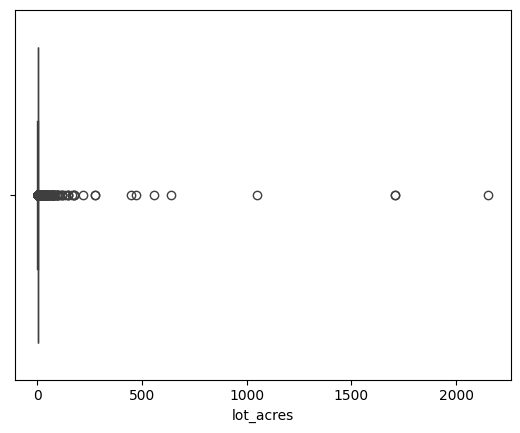

In [ ]:
sns.boxplot(data=X, x='lot_acres', orient='h')

In [ ]:
overview_of_data_distribution_for_column(X, 'lot_acres')

--- OVERVIEW OF DATA DISTRIBUTION FOR 'lot_acres' ---
--- Number of NAs ---
10
--- Number of zeros ---
35
--- Number less than 100 ---
4931
--- Number less than 1000 ---
20
--- Number greater than 1000 ---
4


In [ ]:
print("--- REMOVING OUTLIERS OF 'lot_acres' ---")
total_to_remove = 3
for count in range(total_to_remove):
  print("count: " + str(count))
  maximum_in_lot_acres = X['lot_acres'].max()
  print("MAX: " + str(maximum_in_lot_acres))
  for row in X['lot_acres'].index:
    if X['lot_acres'][row] == maximum_in_lot_acres:
      X.drop(row, inplace=True)
      total_observations_removed += 1
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- REMOVING OUTLIERS OF 'lot_acres' ---
count: 0
MAX: 2154.0
count: 1
MAX: 1707.0
count: 2
MAX: 1048.18
--- TOTAL OBSERVATIONS REMOVED ---
4


In [ ]:
print("--- FINDING AVERAGE OF COLUMN 'lot_acres' IGNORING 0s AND NULLS ---")
print("--- AVERAGE BEFORE (INCLUDES ZEROS) ---")
print(X['lot_acres'].mean())
print("--- SUM OF LOT ACRES ---")
count_no_nulls_lot_acres = X['lot_acres'].count()
sum_lot_acres = X['lot_acres'].sum()
print(count_no_nulls_lot_acres)
print(sum_lot_acres)
number_na_lot_acres = X['lot_acres'].isna().sum()
number_zeros_lot_acres = 0
for row in X['lot_acres']:
  if row == 0:
    number_zeros_lot_acres += 1
print("--- NUMBER OF ZEROS FOUND IN 'lot_acres' ---")
print(number_zeros_lot_acres)
print("--- AVERAGE OF LOT ACRES MINUS 0s AND NULLS ---")
average_no_zeros_lot_acres = sum_lot_acres/(count_no_nulls_lot_acres - number_zeros_lot_acres)
print(average_no_zeros_lot_acres)

--- FINDING AVERAGE OF COLUMN 'lot_acres' IGNORING 0s AND NULLS ---
--- AVERAGE BEFORE (INCLUDES ZEROS) ---
3.3381046931407945
--- SUM OF LOT ACRES ---
4986
16643.79
--- NUMBER OF ZEROS FOUND IN 'lot_acres' ---
35
--- AVERAGE OF LOT ACRES MINUS 0s AND NULLS ---
3.361702686325995


In [ ]:
print("--- REPLACING ZEROS AND NULLS WITH NEW AVERAGE IN 'lot_acres' ---")
X.fillna({'lot_acres':average_no_zeros_lot_acres}, inplace=True)
X.loc[X['lot_acres'] == 0, 'lot_acres'] = average_no_zeros_lot_acres

--- REPLACING ZEROS AND NULLS WITH NEW AVERAGE IN 'lot_acres' ---


In [ ]:
overview_of_data_distribution_for_column(X, 'lot_acres')

--- OVERVIEW OF DATA DISTRIBUTION FOR 'lot_acres' ---
--- Number of NAs ---
0
--- Number of zeros ---
0
--- Number less than 100 ---
4976
--- Number less than 1000 ---
20
--- Number greater than 1000 ---
0


<Axes: xlabel='lot_acres'>

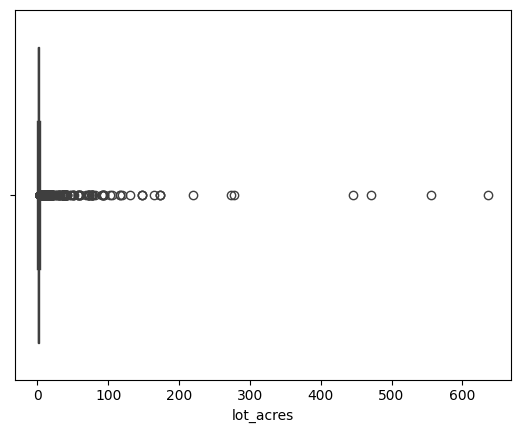

In [ ]:
sns.boxplot(data=X, x='lot_acres', orient='h')

###CLEAN COLUMN 'taxes'

<Axes: xlabel='taxes'>

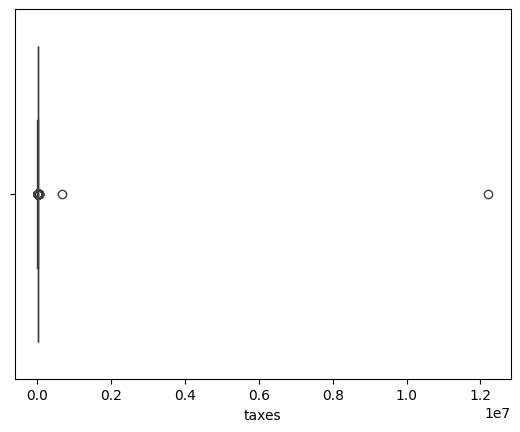

In [ ]:
sns.boxplot(data=X, x='taxes', orient='h')

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'taxes' ---")
print("--- MAX VALUE IN 'taxes' ---")
print(X['taxes'].max())
maximum_value_taxes = X['taxes'].max()
for row in X.index:
  if X.loc[row,'taxes'] == maximum_value_taxes:
    X.drop(row, inplace=True)
    total_observations_removed += 1
print("--- NEW MAX VALUE IN 'taxes' ---")
print(X['taxes'].max())
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'taxes' ---
--- MAX VALUE IN 'taxes' ---
12215075.0
--- NEW MAX VALUE IN 'taxes' ---
668059.0
--- TOTAL OBSERVATIONS REMOVED ---
5


<Axes: xlabel='taxes'>

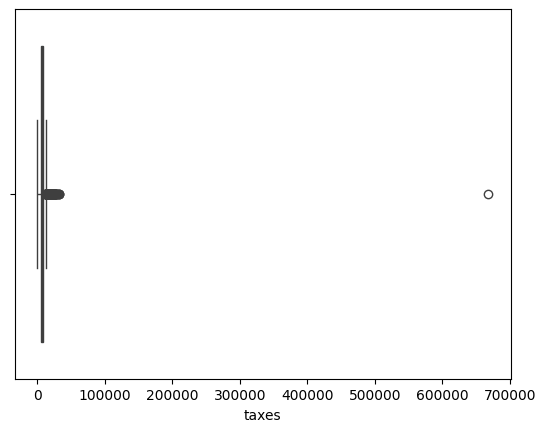

In [ ]:
sns.boxplot(data=X, x='taxes', orient='h')

In [ ]:
print("--- MAX VALUE IN 'taxes' ---")
print(X['taxes'].max())
maximum_value_taxes = X['taxes'].max()
for row in X.index:
  if X.loc[row,'taxes'] == maximum_value_taxes:
    X.drop(row, inplace=True)
    total_observations_removed += 1
print("--- NEW MAX VALUE IN 'taxes' ---")
print(X['taxes'].max())
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- MAX VALUE IN 'taxes' ---
668059.0
--- NEW MAX VALUE IN 'taxes' ---
32442.22
--- TOTAL OBSERVATIONS REMOVED ---
6


<Axes: xlabel='taxes'>

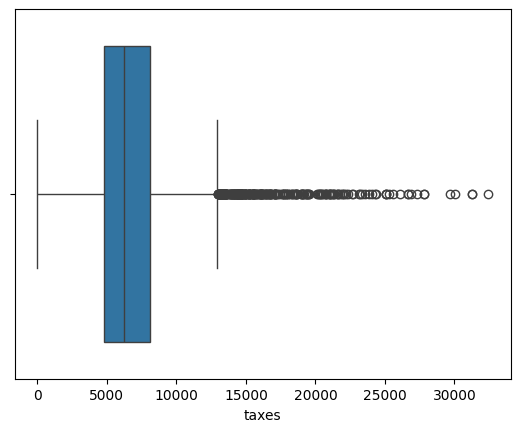

In [ ]:
sns.boxplot(data=X, x='taxes', orient='h')

###CLEAN COLUMN 'year_built'

In [ ]:
def overview_of_data_distribution_for_year_built(X):
  print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'year_built' ---")
  print("--- Number of NAs ---")
  print(X['year_built'].isna().sum())
  print("--- Minimum in 'year_built' ---")
  print(X['year_built'].min())
  count_zeros_year_built = 0
  less_than_1900_year_built = 0
  between_1900_1950_year_built = 0
  between_1950_2000_year_built = 0
  between_2000_2025_year_built = 0
  greater_than_2025_year_built = 0
  for row in X['year_built']:
    if row == 0:
      count_zeros_year_built += 1
    elif row > 0 and row < 1900:
      less_than_1900_year_built += 1
    elif row >= 1900 and row < 1950:
      between_1900_1950_year_built += 1
    elif row >= 1950 and row < 2000:
      between_1950_2000_year_built += 1
    elif row >= 2000 and row < 2025:
      between_2000_2025_year_built += 1
    else:
      greater_than_2025_year_built += 1
  print("--- Number of zeros ---")
  print(count_zeros_year_built)
  print("--- Number less than 1900 ---")
  print(less_than_1900_year_built)
  print("--- Number between 1900 and 1950 ---")
  print(between_1900_1950_year_built)
  print("--- Number between 1950 and 2000 ---")
  print(between_1950_2000_year_built)
  print("--- Number between 2000 and 2025 ---")
  print(between_2000_2025_year_built)
  print("--- Number greater than 2025 ---")
  print(greater_than_2025_year_built)

In [ ]:
overview_of_data_distribution_for_year_built(X)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'year_built' ---
--- Number of NAs ---
0
--- Minimum in 'year_built' ---
0
--- Number of zeros ---
5
--- Number less than 1900 ---
1
--- Number between 1900 and 1950 ---
155
--- Number between 1950 and 2000 ---
2371
--- Number between 2000 and 2025 ---
2462
--- Number greater than 2025 ---
0


In [ ]:
print("--- FIND NEW AVERAGE WITHOUT 0s IN 'year_built' ---")
number_na = X['year_built'].isna().sum()
sum_year_built = X['year_built'].sum()
count_zeros_year_built = 0
for row in X['year_built']:
    if row == 0:
      count_zeros_year_built += 1
number_without_0_year_built = X['year_built'].count() - count_zeros_year_built
print("--- AVERAGE BEFORE ---")
print(X['year_built'].mean())
new_average_year_built = sum_year_built/number_without_0_year_built
X['year_built'] = X['year_built'].astype(float)
print("--- REPLACE 0s in 'year_built' WITH NEW AVERAGE ---")
X.loc[X['year_built'] == 0, 'year_built'] = new_average_year_built
print("--- AVERAGE AFTER ---")
print(X['year_built'].mean())

--- FIND NEW AVERAGE WITHOUT 0s IN 'year_built' ---
--- AVERAGE BEFORE ---
1992.336804164998
--- REPLACE 0s in 'year_built' WITH NEW AVERAGE ---
--- AVERAGE AFTER ---
1994.3335337743035


In [ ]:
overview_of_data_distribution_for_year_built(X)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'year_built' ---
--- Number of NAs ---
0
--- Minimum in 'year_built' ---
1893.0
--- Number of zeros ---
0
--- Number less than 1900 ---
1
--- Number between 1900 and 1950 ---
155
--- Number between 1950 and 2000 ---
2376
--- Number between 2000 and 2025 ---
2462
--- Number greater than 2025 ---
0


###CLEAN COLUMN 'bedrooms'

<Axes: xlabel='bedrooms'>

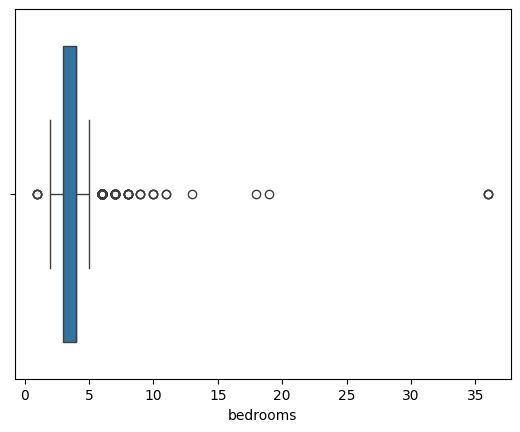

In [ ]:
sns.boxplot(data=X, x='bedrooms', orient='h')

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'bedrooms' ---")
maximum_bedrooms = X['bedrooms'].max()
print("--- MAXIMUM 'bedrooms' ---")
print(maximum_bedrooms)
for row in X['bedrooms'].index:
  if X.loc[row,'bedrooms'] == maximum_bedrooms:
    X.drop(row, inplace=True)
    total_observations_removed += 1
maximum_bedrooms = X['bedrooms'].max()
print("--- NEW MAXIMUM 'bedrooms' ---")
print(maximum_bedrooms)
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'bedrooms' ---
--- MAXIMUM 'bedrooms' ---
36
--- NEW MAXIMUM 'bedrooms' ---
19
--- TOTAL OBSERVATIONS REMOVED ---
9


<Axes: xlabel='bedrooms'>

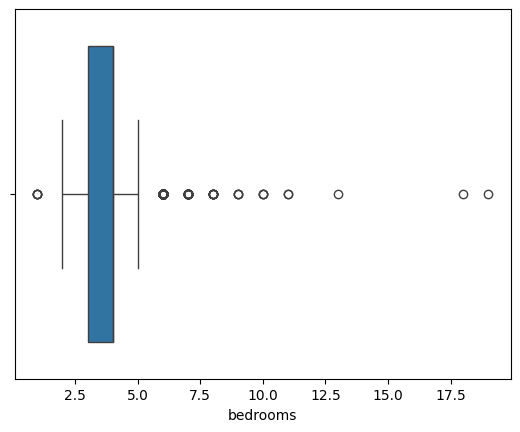

In [ ]:
sns.boxplot(data=X, x='bedrooms', orient='h')

###CLEAN COLUMN 'bathrooms'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'bathrooms' ---")
print("--- AVEAGE OF 'bathrooms' ---")
print(X['bathrooms'].mean())
print("--- NUMBER OF NAs IN 'bathrooms' ---")
print(X['bathrooms'].isna().sum())
number_zeros_bathrooms = 0
for row in X['bathrooms']:
  if row == 0:
    number_zeros_bathrooms += 1
print("--- NUMBER OF ZEROS IN 'bathrooms' ---")
print(number_zeros_bathrooms)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'bathrooms' ---
--- AVEAGE OF 'bathrooms' ---
3.8109327983951857
--- NUMBER OF NAs IN 'bathrooms' ---
6
--- NUMBER OF ZEROS IN 'bathrooms' ---
0


In [ ]:
print("--- REPLACING NULLS WITH AVERAGE IN 'bathrooms' ---")
X.fillna({'bathrooms':X['bathrooms'].mean()}, inplace=True)
print("--- NUMBER OF NAs IN 'bathrooms' ---")
print(X['bathrooms'].isna().sum())

--- REPLACING NULLS WITH AVERAGE IN 'bathrooms' ---
--- NUMBER OF NAs IN 'bathrooms' ---
0


<Axes: xlabel='bathrooms'>

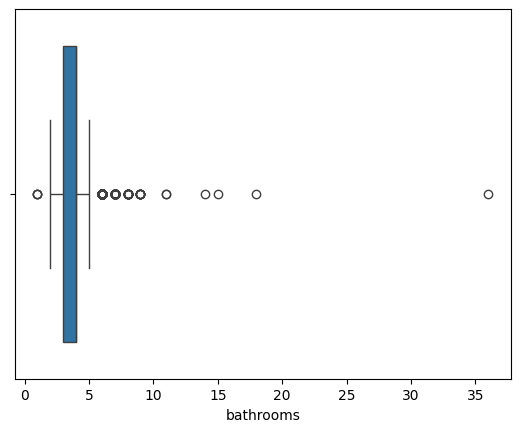

In [ ]:
sns.boxplot(data=X, x='bathrooms', orient='h')

In [ ]:
print("--- REMOVING OUTLIER IN 'bathrooms' ---")
maximum_bathrooms = X['bathrooms'].max()
print("--- MAXIMUM 'bathrooms' ---")
print(maximum_bathrooms)
for row in X['bathrooms'].index:
  if X['bathrooms'][row] == maximum_bathrooms:
    if X.loc[row,'bathrooms'] == maximum_bathrooms:
      X.drop(row, inplace=True)
      total_observations_removed += 1
print("--- NEW MAXIMUM 'bathrooms' ---")
print(X['bathrooms'].max())
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- REMOVING OUTLIER IN 'bathrooms' ---
--- MAXIMUM 'bathrooms' ---
36.0
--- NEW MAXIMUM 'bathrooms' ---
18.0
--- TOTAL OBSERVATIONS REMOVED ---
10


<Axes: xlabel='bathrooms'>

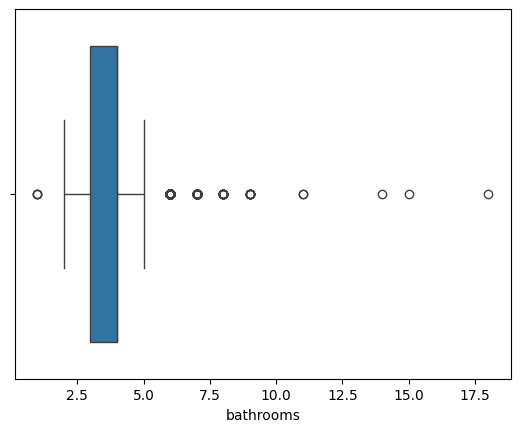

In [ ]:
sns.boxplot(data=X, x='bathrooms', orient='h')

###CLEAN COLUMN 'sqrt_ft'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'sqrt_ft' ---")
print("--- AVEAGE OF 'sqrt_ft' ---")
print(X['sqrt_ft'].mean())
print("--- NUMBER OF NAs IN 'sqrt_ft' ---")
print(X['sqrt_ft'].isna().sum())
number_zeros_sqrt_ft = 0
for row in X['sqrt_ft']:
  if row == 0:
    number_zeros_bathrooms += 1
print("--- NUMBER OF ZEROS IN 'sqrt_ft' ---")
print(number_zeros_sqrt_ft)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'sqrt_ft' ---
--- AVEAGE OF 'sqrt_ft' ---
3706.5641410048624
--- NUMBER OF NAs IN 'sqrt_ft' ---
54
--- NUMBER OF ZEROS IN 'sqrt_ft' ---
0


In [ ]:
print("--- REPLACING NULLS WITH AVERAGE IN 'sqrt_ft' ---")
X.fillna({'sqrt_ft':X['sqrt_ft'].mean()}, inplace=True)
print("--- NUMBER OF NAs IN 'sqrt_ft' ---")
print(X['sqrt_ft'].isna().sum())

--- REPLACING NULLS WITH AVERAGE IN 'sqrt_ft' ---
--- NUMBER OF NAs IN 'sqrt_ft' ---
0


###CLEAN COLUMN 'garage'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'garage' ---")
print("--- AVEAGE OF 'garage' ---")
print(X['garage'].mean())
print("--- NUMBER OF NAs IN 'garage' ---")
print(X['garage'].isna().sum())
number_zeros_garage = 0
for row in X['garage']:
  if row == 0:
    number_zeros_garage += 1
print("--- NUMBER OF ZEROS IN 'garage' ---")
print(number_zeros_garage)

--- OVERVIEW OF DATA DISTRIBUTION FOR 'garage' ---
--- AVEAGE OF 'garage' ---
2.8188565697091272
--- NUMBER OF NAs IN 'garage' ---
5
--- NUMBER OF ZEROS IN 'garage' ---
179


In [ ]:
print("--- REPLACING NULLS WITH 0 IN 'garage' ---")
X.fillna({'garage': 0}, inplace=True)
print("--- AVEAGE OF 'garage' ---")
print(X['garage'].mean())
print("--- NUMBER OF NAs IN 'garage' ---")
print(X['garage'].isna().sum())
number_zeros_garage = 0
for row in X['garage']:
  if row == 0:
    number_zeros_garage += 1
print("--- NUMBER OF ZEROS IN 'garage' ---")
print(number_zeros_garage)

--- REPLACING NULLS WITH 0 IN 'garage' ---
--- AVEAGE OF 'garage' ---
2.8160320641282564
--- NUMBER OF NAs IN 'garage' ---
0
--- NUMBER OF ZEROS IN 'garage' ---
184


###CLEAN COLUMN 'kitchen_features'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'kitchen_features' ---")
print("--- NUMBER OF NAs IN 'kitchen_features' BEFORE REPLACEMENT WITH 'None' ---")
print(X['kitchen_features'].isna().sum())
X.fillna({'kitchen_features':"None"}, inplace=True)
print("--- NUMBER OF NAs IN 'kitchen_features' AFTER REPLACEMENT WITH 'None' ---")
print(X['kitchen_features'].isna().sum())

--- OVERVIEW OF DATA DISTRIBUTION FOR 'kitchen_features' ---
--- NUMBER OF NAs IN 'kitchen_features' BEFORE REPLACEMENT WITH 'None' ---
33
--- NUMBER OF NAs IN 'kitchen_features' AFTER REPLACEMENT WITH 'None' ---
0


In [ ]:
kitchen_features_dict = dict()
for row in X['kitchen_features'].index:
  features_list = [feature.strip() for feature in list(X.loc[row, 'kitchen_features'].split(','))]
  features_list.sort()
  features_word = ','.join(features_list)
  X.loc[row, 'kitchen_features'] = features_word
  kitchen_features_dict[features_word] = kitchen_features_dict.setdefault(features_word, 0)+1
print("--- NUMBER OF 'None' IN 'kitchen_features' ---")
print(kitchen_features_dict["None"])
print("--- NUMBER OF DIFFERENT LISTS IN 'kitchen_features' ---")
print(len(kitchen_features_dict))

--- NUMBER OF 'None' IN 'kitchen_features' ---
33
--- NUMBER OF DIFFERENT LISTS IN 'kitchen_features' ---
1868


###CLEAN COLUMN 'fireplaces'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'fireplaces' ---")
print("--- NUMBER OF NAs IN 'fireplaces' BEFORE ---")
print(X['fireplaces'].isna().sum())
X['fireplaces'] = pd.to_numeric(X['fireplaces'], errors='coerce')
print(type(X['fireplaces']))
print(type(X['fireplaces'][10]))
print("--- NUMBER OF NAs IN 'fireplaces' AFTER ---")
X.fillna({'fireplaces': 0}, inplace=True)
print(X['fireplaces'].isna().sum())
equal_0_fireplaces = 0
between_0_5_fireplaces = 0
greater_5_fireplaces = 0
for row in X['fireplaces']:
  if row == 0:
    equal_0_fireplaces += 1
  elif row > 0 and row <= 5:
    between_0_5_fireplaces += 1
  else:
    greater_5_fireplaces += 1
print("---  COUNT == 0 'fireplaces' ---")
print(equal_0_fireplaces)
print("---  COUNT BETWEEN 0 AND 5 'fireplaces' ---")
print(between_0_5_fireplaces)
print("---  COUNT > 5 'fireplaces' ---")
print(greater_5_fireplaces)
print("--- MIN VALUE IN 'fireplaces' ---")
print(X['fireplaces'].min())
print("--- MAX VALUE IN 'fireplaces' ---")
print(X['fireplaces'].max())

--- OVERVIEW OF DATA DISTRIBUTION FOR 'fireplaces' ---
--- NUMBER OF NAs IN 'fireplaces' BEFORE ---
0
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
--- NUMBER OF NAs IN 'fireplaces' AFTER ---
0
---  COUNT == 0 'fireplaces' ---
328
---  COUNT BETWEEN 0 AND 5 'fireplaces' ---
4633
---  COUNT > 5 'fireplaces' ---
29
--- MIN VALUE IN 'fireplaces' ---
0.0
--- MAX VALUE IN 'fireplaces' ---
9.0


###CLEAN COLUMN 'floor_covering'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'floor_covering' ---")
print("--- NUMBER OF NAs IN 'floor_covering' BEFORE REPLACEMENT WITH 'None' ---")
print(X['floor_covering'].isna().sum())
X.fillna({'floor_covering':"None"}, inplace=True)
print("--- NUMBER OF NAs IN 'floor_covering' AFTER REPLACEMENT WITH 'None' ---")
print(X['floor_covering'].isna().sum())

--- OVERVIEW OF DATA DISTRIBUTION FOR 'floor_covering' ---
--- NUMBER OF NAs IN 'floor_covering' BEFORE REPLACEMENT WITH 'None' ---
1
--- NUMBER OF NAs IN 'floor_covering' AFTER REPLACEMENT WITH 'None' ---
0


In [ ]:
floor_covering_dict = dict()
for row in X['floor_covering'].index:
  floor_covering_list = [covering.strip() for covering in list(X.loc[row, 'floor_covering'].split(','))]
  floor_covering_list.sort()
  floor_covering_word = ','.join(floor_covering_list)
  X.loc[row, 'floor_covering'] = floor_covering_word
  floor_covering_dict[floor_covering_word] = floor_covering_dict.setdefault(floor_covering_word, 0)+1
print("--- NUMBER OF 'None' IN 'floor_covering' ---")
print(floor_covering_dict["None"])
print("--- NUMBER OF DIFFERENT LISTS IN 'floor_covering' ---")
print(len(floor_covering_dict))

--- NUMBER OF 'None' IN 'floor_covering' ---
1
--- NUMBER OF DIFFERENT LISTS IN 'floor_covering' ---
309


###CLEAN COLUMN 'HOA'

In [ ]:
print("--- OVERVIEW OF DATA DISTRIBUTION FOR 'HOA' ---")
print("--- NUMBER OF NAs in 'HOA' ---")
print(X['HOA'].isna().sum())
X.fillna({'HOA':-1}, inplace=True)
print("--- REPLACING NAs WITH -1s ---")
print("--- NUMBER OF NAs IN 'HOA' AFTER REPLACMENT ---")
print(X['HOA'].isna().sum())

--- OVERVIEW OF DATA DISTRIBUTION FOR 'HOA' ---
--- NUMBER OF NAs in 'HOA' ---
557
--- REPLACING NAs WITH -1s ---
--- NUMBER OF NAs IN 'HOA' AFTER REPLACMENT ---
0


<Axes: xlabel='HOA'>

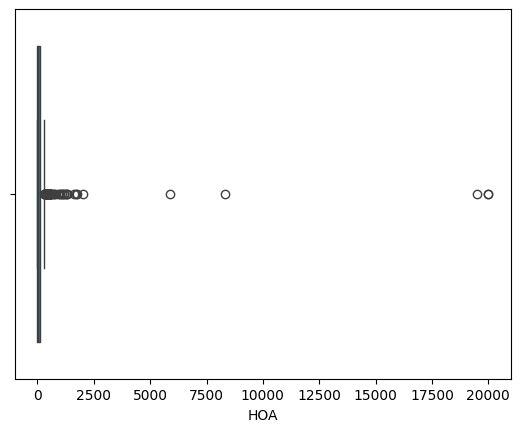

In [ ]:
sns.boxplot(data=X, x='HOA', orient='h')

In [ ]:
number_to_remove_HOA = 4
for count in range(number_to_remove_HOA):
  maximum_HOA = X['HOA'].max()
  print("--- MAXIMUM HOA ---")
  print(maximum_HOA)
  for row in X['HOA'].index:
    if X.loc[row,'HOA'] == maximum_HOA:
      X.drop(row, inplace=True)
      total_observations_removed += 1

print("--- NEW MAXIMUM 'HOA' ---")
print(X['HOA'].max())
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- MAXIMUM HOA ---
20000.0
--- MAXIMUM HOA ---
19480.0
--- MAXIMUM HOA ---
8333.0
--- MAXIMUM HOA ---
5900.0
--- NEW MAXIMUM 'HOA' ---
2000.0
--- TOTAL OBSERVATIONS REMOVED ---
15


<Axes: xlabel='HOA'>

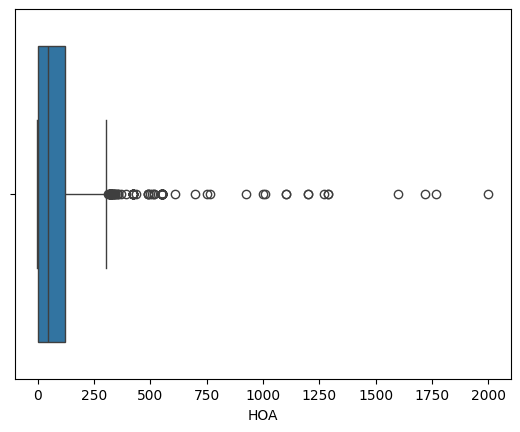

In [ ]:
sns.boxplot(data=X, x='HOA', orient='h')

###REMOVE DUPLICATES FROM DATAFRAME

In [ ]:
print("--- X SHAPE ---")
print(X.shape)
rows_before_dup_removal = X.shape[0]
print("--- REMOVING DUPLICATES ---")
X.drop_duplicates(inplace=True)
rows_after_dup_removal = X.shape[0]
total_dups_removed = rows_before_dup_removal - rows_after_dup_removal
total_observations_removed -= total_dups_removed
print("--- X SHAPE ---")
print(X.shape)
print("--- TOTAL OBSERVATIONS REMOVED ---")
print(total_observations_removed)

--- X SHAPE ---
(4985, 16)
--- REMOVING DUPLICATES ---
--- X SHAPE ---
(4985, 16)
--- TOTAL OBSERVATIONS REMOVED ---
15


##SAVING CLEANED DATA TO NEW CSV FILE

In [ ]:
raw_house_data_cleaned = '/content/raw_house_data_cleaned.csv'
X.to_csv(raw_house_data_cleaned, index=False)

##VISUALIZING THE DATA

###RENAMED HEADERS FOR GRAPHING

In [ ]:
headers_to_boxplot = [header for header in X.columns.tolist() if header not in ['MLS','longitude','latitude']]
X=X.rename(columns={'sold_price':'Sold Price','zipcode':'ZIP Code','longitude':'Longitude','latitude':'Latitude','lot_acres':'Lot Acres',
                  'taxes':'Taxes','year_built':'Year Built','bedrooms':'Bedrooms','bathrooms':'Bathrooms','sqrt_ft':'Square Footage',
                  'garage':'Garage','kitchen_features':'Kitchen Features','fireplaces':'Fireplaces','floor_covering':'Floor Covering'})
print(X.columns.tolist())

['MLS', 'Sold Price', 'ZIP Code', 'Longitude', 'Latitude', 'Lot Acres', 'Taxes', 'Year Built', 'Bedrooms', 'Bathrooms', 'Square Footage', 'Garage', 'Kitchen Features', 'Fireplaces', 'Floor Covering', 'HOA']


###HISTOGRAMS

<Axes: ylabel='Frequency'>

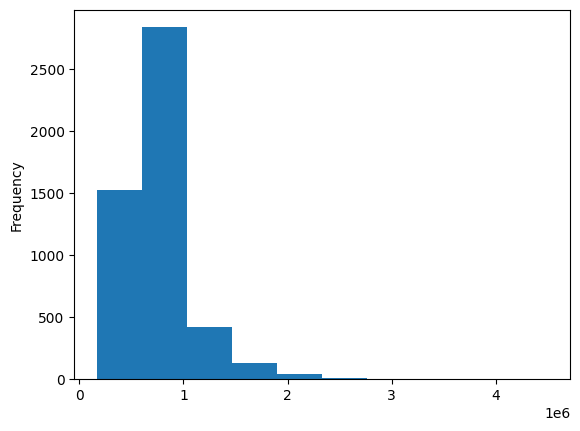

In [ ]:
X['Sold Price'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

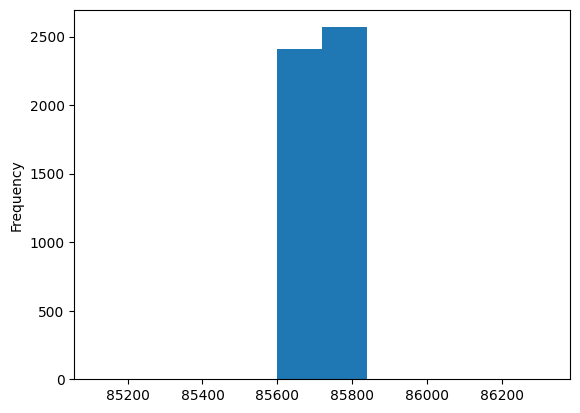

In [ ]:
X['ZIP Code'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

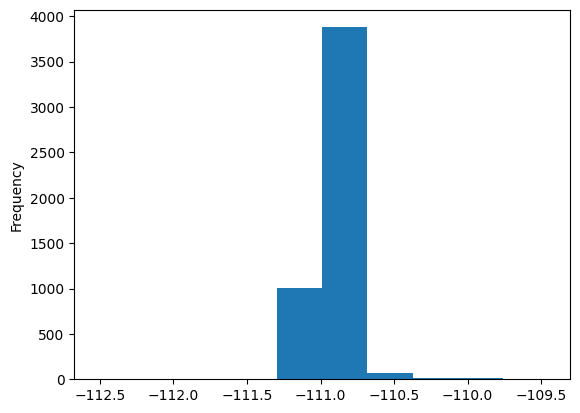

In [ ]:
X['Longitude'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

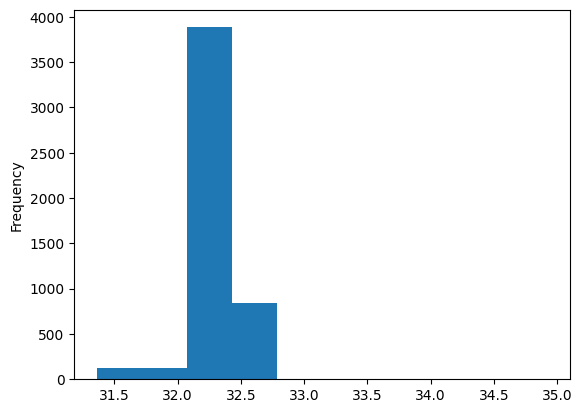

In [ ]:
X['Latitude'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

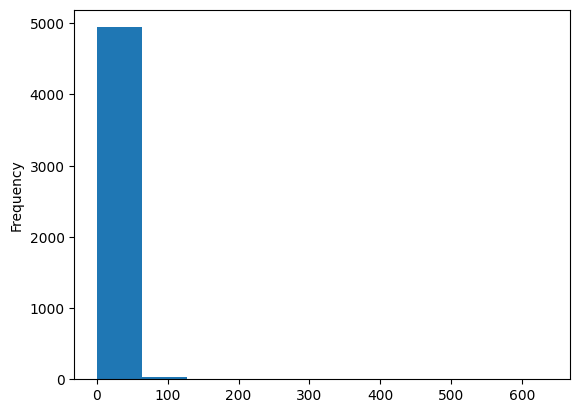

In [ ]:
X['Lot Acres'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

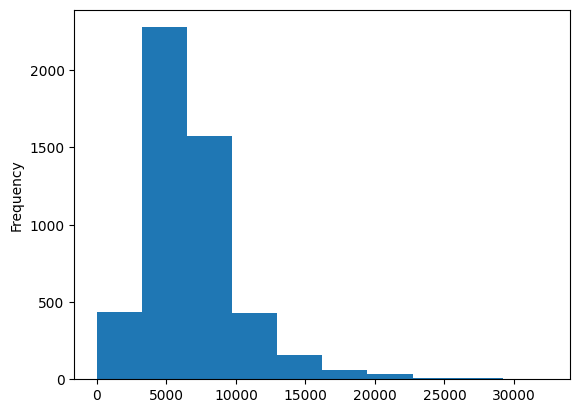

In [ ]:
X['Taxes'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

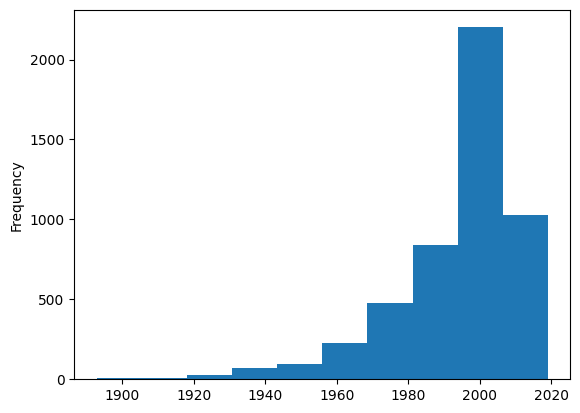

In [ ]:
X['Year Built'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

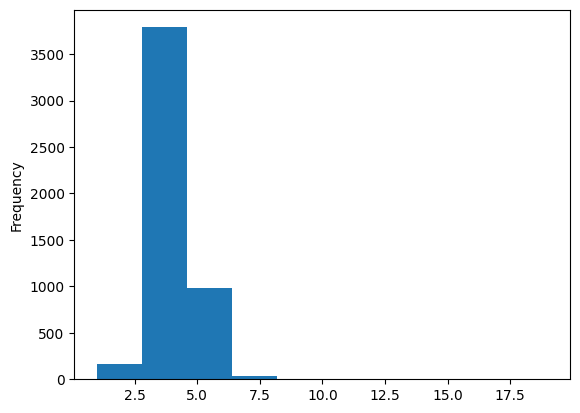

In [ ]:
X['Bedrooms'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

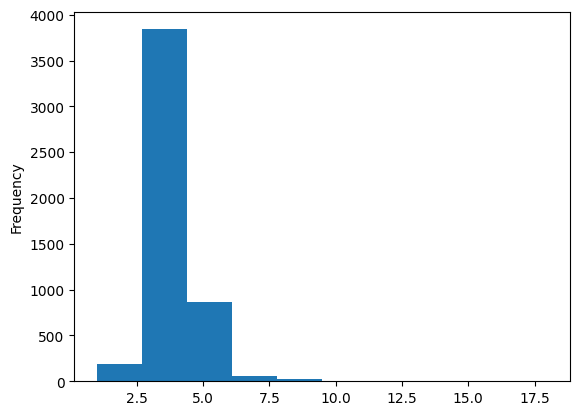

In [ ]:
X['Bathrooms'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

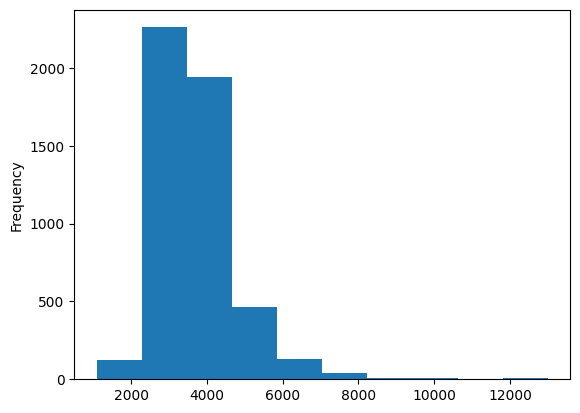

In [ ]:
X['Square Footage'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

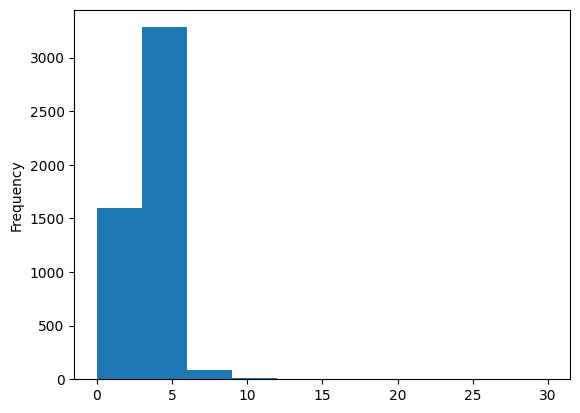

In [ ]:
X['Garage'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

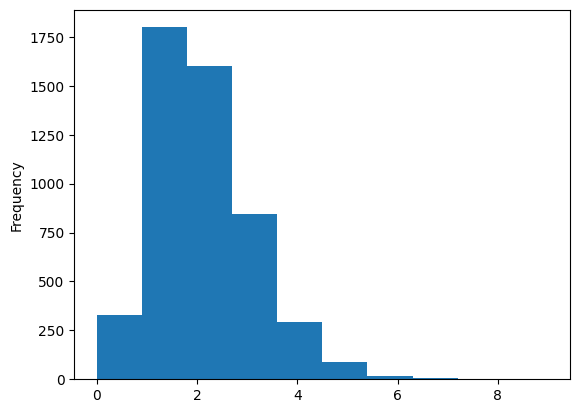

In [ ]:
X['Fireplaces'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

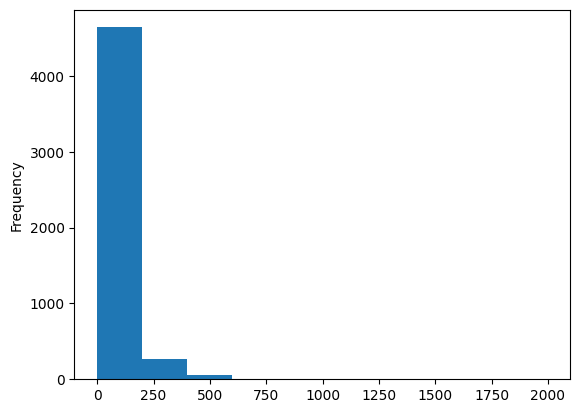

In [ ]:
X['HOA'].plot(kind = 'hist')

###PAIR PLOTS

In [ ]:
headers_to_plot = ['Sold Price', 'ZIP Code', 'Longitude', 'Latitude', 'Lot Acres', 'Taxes', 'Year Built', 'Bedrooms', 'Bathrooms', 'Square Footage', 'Garage', 'Fireplaces', 'HOA']
features_to_plot = X.loc[:, headers_to_plot]
print("--- features_to_plot.info() ---")
features_to_plot.info()

--- features_to_plot.info() ---
<class 'pandas.core.frame.DataFrame'>
Index: 4985 entries, 3 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sold Price      4985 non-null   float64
 1   ZIP Code        4985 non-null   int64  
 2   Longitude       4985 non-null   float64
 3   Latitude        4985 non-null   float64
 4   Lot Acres       4985 non-null   float64
 5   Taxes           4985 non-null   float64
 6   Year Built      4985 non-null   float64
 7   Bedrooms        4985 non-null   int64  
 8   Bathrooms       4985 non-null   float64
 9   Square Footage  4985 non-null   float64
 10  Garage          4985 non-null   float64
 11  Fireplaces      4985 non-null   float64
 12  HOA             4985 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 674.3 KB


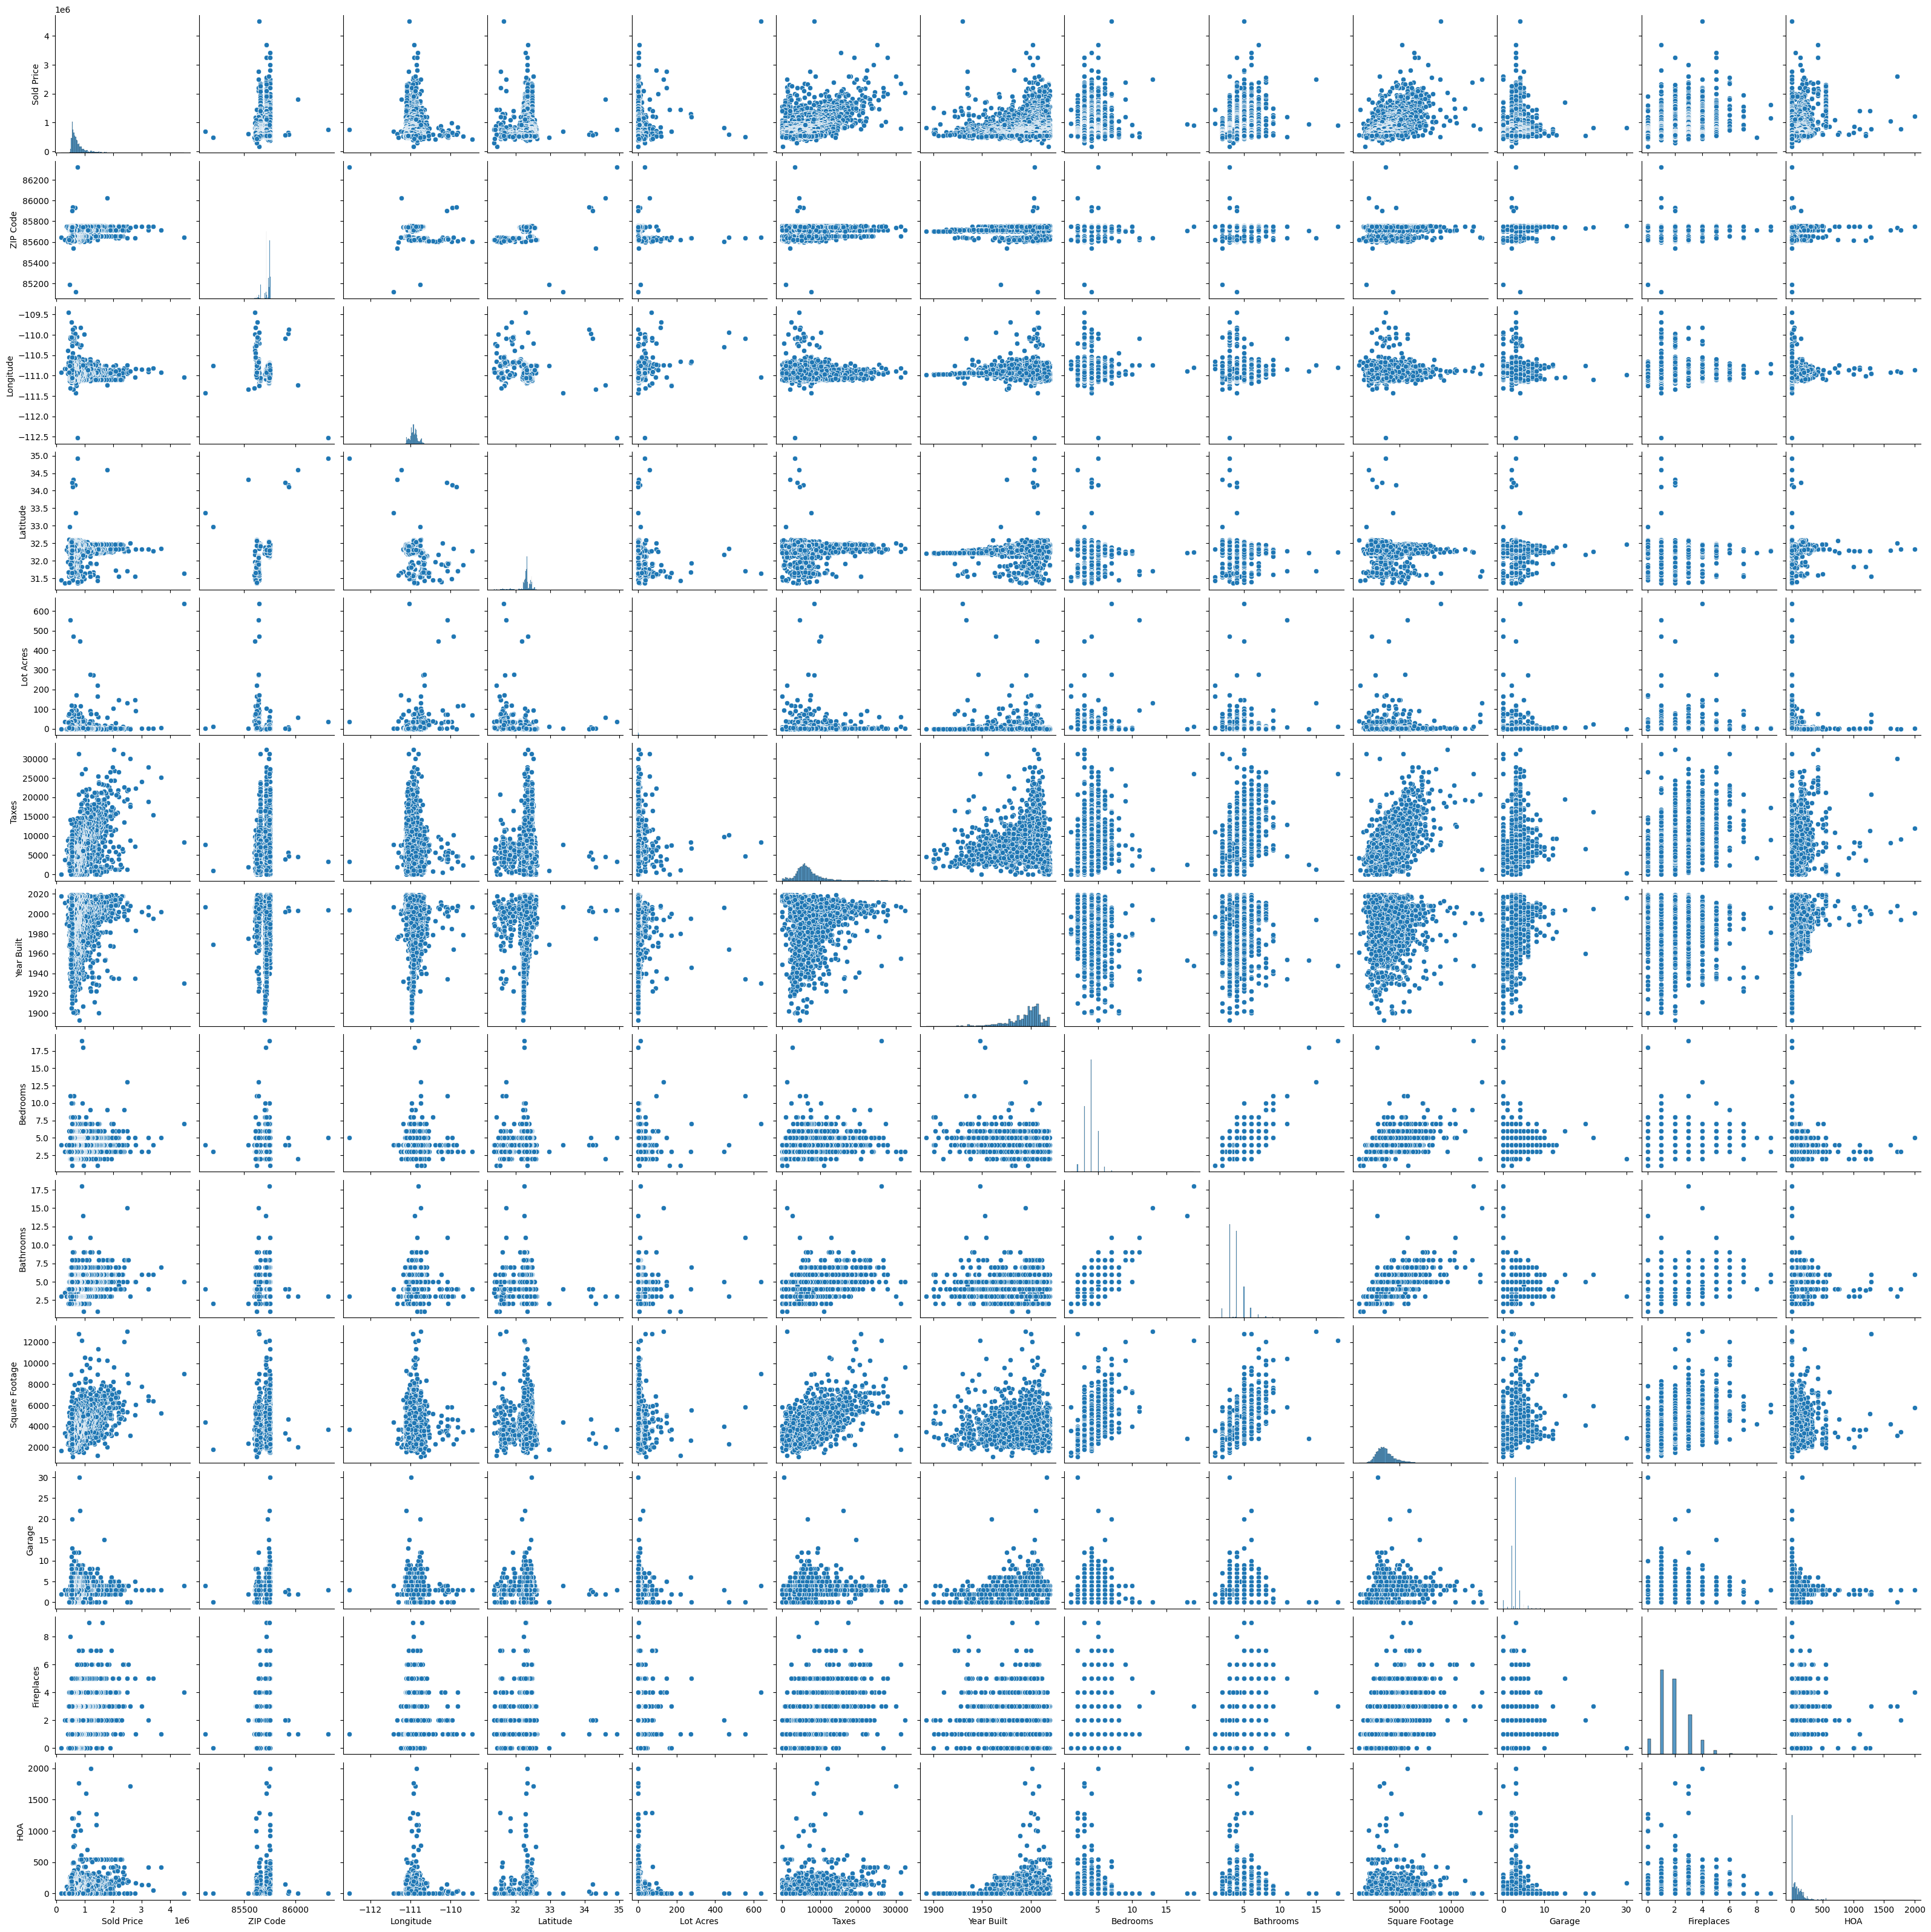

In [ ]:
sns.pairplot(features_to_plot)

###HEATMAP

<Axes: >

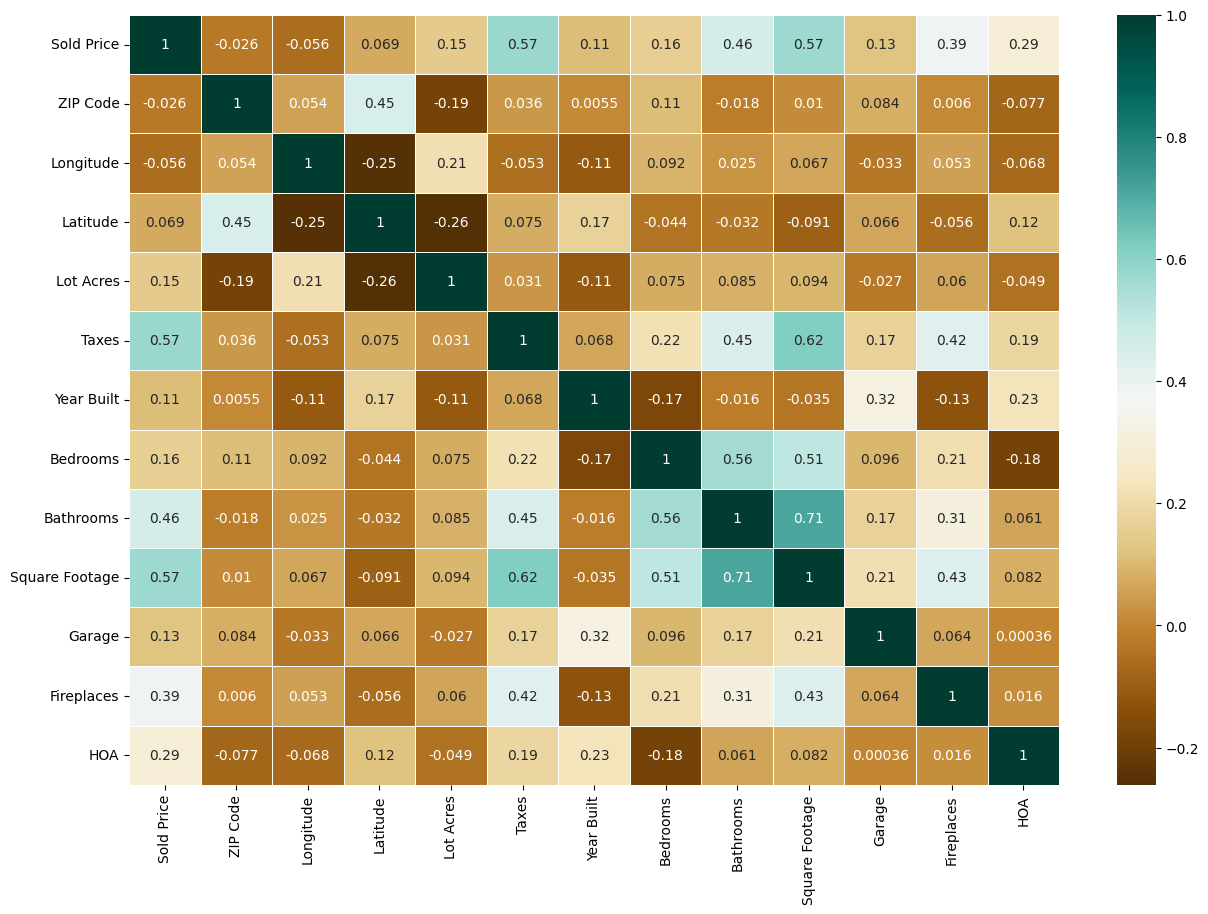

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(features_to_plot.corr(), cmap="BrBG", annot=True, linewidths=.5, ax=ax)

###BOXPLOTS

<Axes: xlabel='Sold Price'>

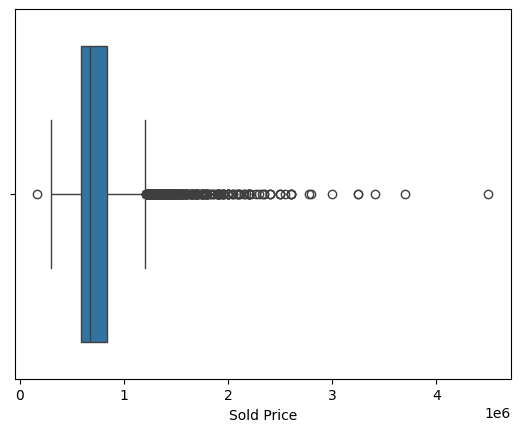

In [ ]:
sns.boxplot(data=X, x='Sold Price', orient='h')

<Axes: xlabel='ZIP Code'>

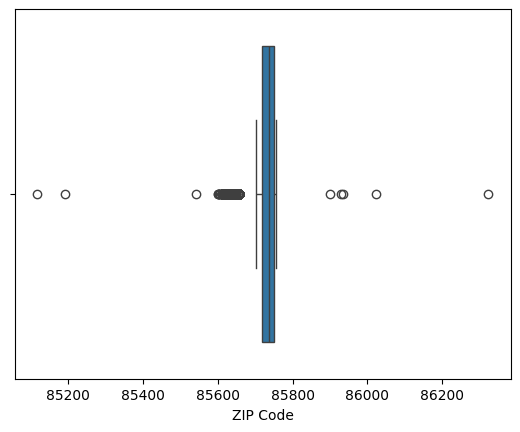

In [ ]:
sns.boxplot(data=X, x='ZIP Code', orient='h')

<Axes: xlabel='Longitude'>

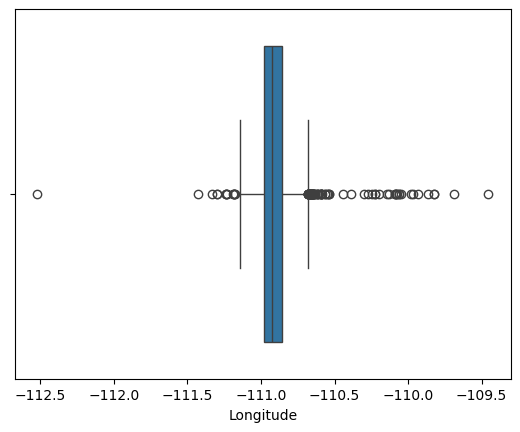

In [ ]:
sns.boxplot(data=X, x='Longitude', orient='h')

<Axes: xlabel='Latitude'>

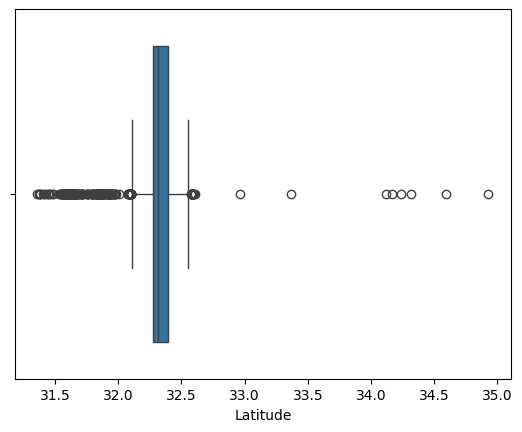

In [ ]:
sns.boxplot(data=X, x='Latitude', orient='h')

<Axes: xlabel='Lot Acres'>

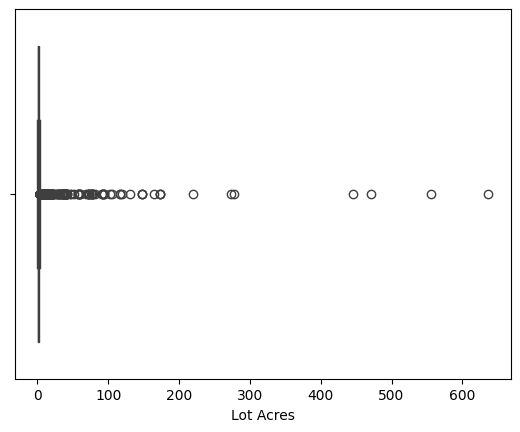

In [ ]:
sns.boxplot(data=X, x='Lot Acres', orient='h')

<Axes: xlabel='Taxes'>

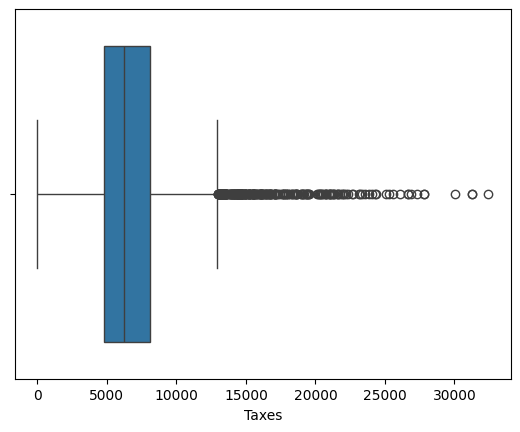

In [ ]:
sns.boxplot(data=X, x='Taxes', orient='h')

<Axes: xlabel='Year Built'>

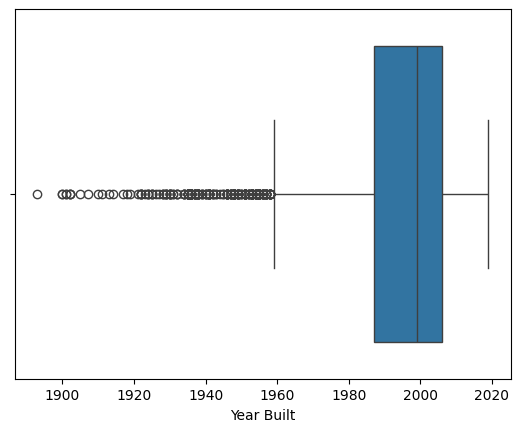

In [ ]:
sns.boxplot(data=X, x='Year Built', orient='h')

<Axes: xlabel='Bedrooms'>

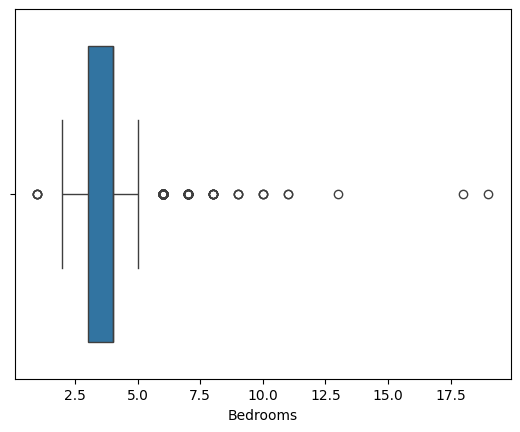

In [ ]:
sns.boxplot(data=X, x='Bedrooms', orient='h')

<Axes: xlabel='Bathrooms'>

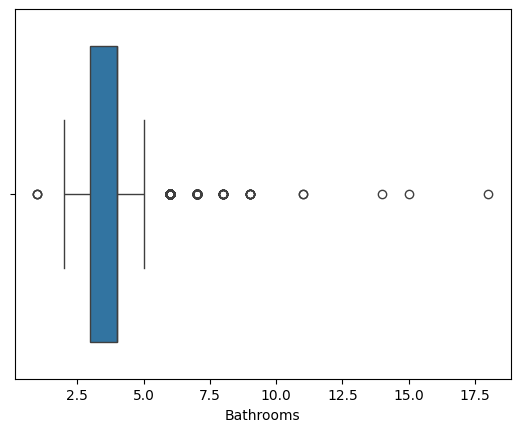

In [ ]:
sns.boxplot(data=X, x='Bathrooms', orient='h')

<Axes: xlabel='Square Footage'>

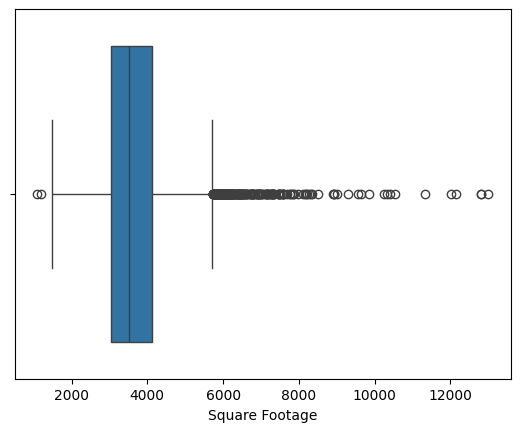

In [ ]:
sns.boxplot(data=X, x='Square Footage', orient='h')

<Axes: xlabel='Garage'>

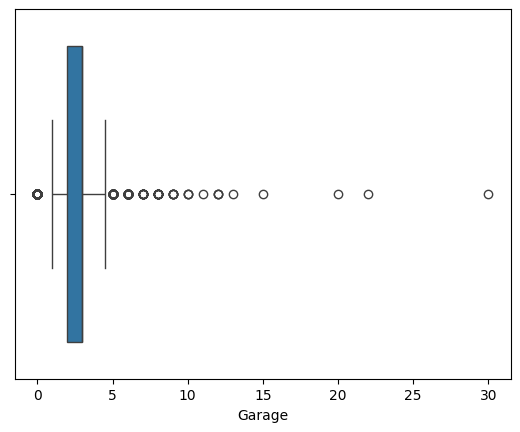

In [ ]:
sns.boxplot(data=X, x='Garage', orient='h')

<Axes: xlabel='Fireplaces'>

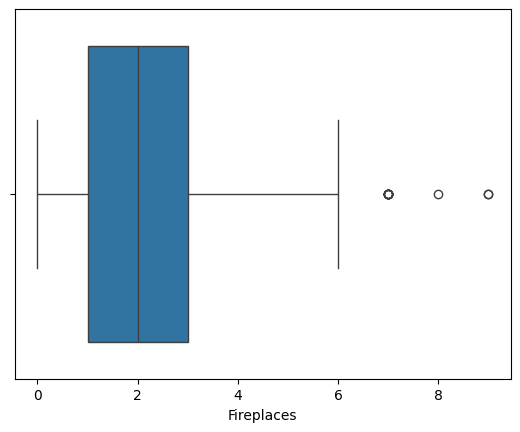

In [ ]:
sns.boxplot(data=X, x='Fireplaces', orient='h')

<Axes: xlabel='HOA'>

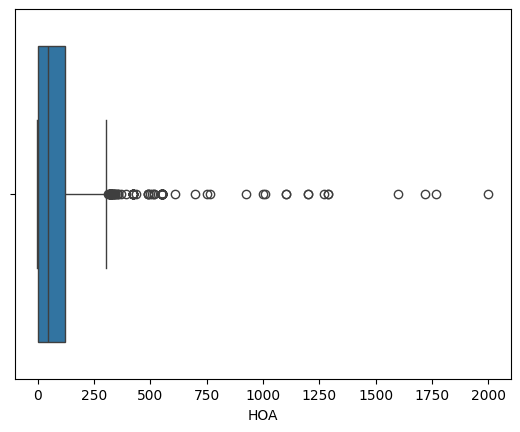

In [ ]:
sns.boxplot(data=X, x='HOA', orient='h')